### TCC 6 – individual - Tatiana Prado Santos Massoco

# Desenvolvimento de Modelo Preditivo de Risco ESG para Investimentos Sustentáveis

Fonte de daddos: https://www.kaggle.com/datasets/tunguz/environment-social-and-governance-data/data

### EDA (Exploratory Data Analysis) - Análise Exploratória de Dados

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar gráficos para visualização dentro do notebook
%matplotlib inline
sns.set(style="whitegrid")

# Caminho para o arquivo de dados limpo
caminho_dados = "../data/ESGData_clean_final.csv"

# Carregar o dataset
dados = pd.read_csv(caminho_dados)

# Exibir as primeiras linhas do dataset para revisão inicial
dados.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,1970_log,1980_log,1990_log,2000_log,2010_log
0,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,6.277652,5.261868,6.385551,8.190277,20.363941,1.873761,3.334040,2.207838,2.426250,2.394812
1,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,0.086177,0.076670,0.085885,0.047916,20.363941,0.117221,0.036283,0.051367,0.030845,0.051462
2,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,27.835643,27.826564,27.845522,27.847925,27.866972,27.866171,...,36.624759,36.610850,17.396336,18.176999,20.363941,3.369722,3.387835,3.482304,3.619277,3.622365
3,Arab World,ARB,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,5.432857,5.482909,5.119066,4.735027,4.560470,2.107454,1.979585,2.415767,2.134617,1.820926
4,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.660638,0.724944,0.850567,0.969476,1.135271,1.248257,...,4.933420,4.712845,17.396336,18.176999,20.363941,1.026961,1.406725,1.371434,1.549034,1.728224


In [2]:
# Exibir informações gerais do dataset
dados.info()

# Exibir estatísticas descritivas para as colunas numéricas
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    5626 non-null   object 
 1   Country Code    5626 non-null   object 
 2   Indicator Name  5626 non-null   object 
 3   Indicator Code  5626 non-null   object 
 4   1961            5626 non-null   float64
 5   1962            5626 non-null   float64
 6   1963            5626 non-null   float64
 7   1964            5626 non-null   float64
 8   1965            5626 non-null   float64
 9   1966            5626 non-null   float64
 10  1967            5626 non-null   float64
 11  1968            5626 non-null   float64
 12  1969            5626 non-null   float64
 13  1970            5626 non-null   float64
 14  1971            5626 non-null   float64
 15  1972            5626 non-null   float64
 16  1973            5626 non-null   float64
 17  1974            5626 non-null   f

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2015,2016,2017,2018,2019,1970_log,1980_log,1990_log,2000_log,2010_log
count,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,...,5.626000e+03,5.626000e+03,5.626000e+03,5.626000e+03,5.626000e+03,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000
mean,40.859079,42.151734,43.544570,44.624130,45.576310,46.147120,47.019748,48.018346,49.350241,42.348561,...,3.009122e+03,3.487179e+03,3.554149e+03,3.823583e+03,3.520145e+03,2.259386,2.654036,2.795907,2.817323,2.916583
std,277.539368,282.945827,290.845655,300.137197,305.034299,308.189647,312.799087,327.262310,341.816739,359.545768,...,5.492168e+04,6.502821e+04,6.661469e+04,7.250746e+04,6.627365e+04,1.234305,1.603246,1.840223,1.875583,1.885532
min,-27.270000,-19.685042,-17.080467,-19.719407,-17.715074,-17.760415,-15.863752,-16.072351,-15.405856,-14.970166,...,-5.813466e+02,-1.019039e+01,-6.799428e+00,-6.356339e+00,-8.100000e+00,-1.425736,-4.100609,-2.036882,-3.526754,-2.575505
25%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,6.631343,...,4.960000e+00,5.648155e+00,8.179701e+00,8.483216e+00,2.036394e+01,2.043889,1.653203,1.248221,1.273871,1.380161
50%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,7.188000,...,2.544308e+01,2.457550e+01,1.739634e+01,1.817700e+01,2.036394e+01,2.107454,2.571328,2.968362,2.865028,3.019449
75%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,8.373408,...,6.523484e+01,6.246872e+01,4.396814e+01,4.256721e+01,2.036394e+01,2.237874,3.660753,4.152592,4.243773,4.267557
max,11252.096695,11366.058214,11429.699063,11463.246177,11485.939813,11497.286630,11490.873212,11496.793291,11974.192593,12106.152944,...,1.864186e+06,2.128683e+06,2.162897e+06,2.294881e+06,2.144825e+06,9.401552,12.722951,13.201904,13.620911,13.964706


### Análise Inicial do Dataset

**1.  Análise das Colunas e Tipos de Dados**

As colunas numéricas e os indicadores estão bem estruturados, o que permitirá trabalhar diretamente com as estatísticas descritivas e as correlações.

**2.  Estrutura do Dataset**

- O dataset tem **5626 entradas** e **68 colunas**.
- As colunas numéricas foram corretamente preenchidas, sem valores ausentes.

**3.  Resumo Estatístico**

Os dados apresentam uma ampla gama de valores, com algumas colunas contendo valores negativos e outros muito altos. Isso pode indicar a necessidade de normalização em etapas futuras.

---

### Próximos Passos para o EDA

**1.  Explorar Distribuições**

- Criar gráficos de distribuição para as colunas principais (por exemplo, indicadores econômicos, ambientais e sociais).
- Avaliar a presença de valores discrepantes (outliers).

**2.  Analisar Correlações**

- Gerar uma matriz de correlação entre os indicadores para identificar relações significativas.

**3.  Explorar Tendências Temporais**

- Visualizar como os indicadores mudam ao longo do tempo para alguns países específicos.

**4.  Identificar Países Relevantes**

- Analisar quais países têm maior impacto em determinados indicadores ESG.

### Lista dos 33 Indicadores presentes na Base de Dados

- Adjusted savings: natural resources depletion (% of GNI)
- Adjusted savings: net forest depletion (% of GNI)
- Agricultural land (% of land area)
- Agriculture, forestry, and fishing, value added (% of GDP)
- CO2 emissions (metric tons per capita)
- Electricity production from coal sources (% of total)
- Energy imports, net (% of energy use)
- Energy use (kg of oil equivalent per capita)
- Fertility rate, total (births per woman)
- Food production index (2004-2006 = 100)
- Forest area (% of land area)
- Fossil fuel energy consumption (% of total)
- GDP growth (annual %)
- Individuals using the Internet (% of population)
- Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)
- Life expectancy at birth, total (years)
- Literacy rate, adult total (% of people ages 15 and above)
- Methane emissions (metric tons of CO2 equivalent per capita)
- Mortality rate, under-5 (per 1,000 live births)
- Nitrous oxide emissions (metric tons of CO2 equivalent per capita)
- Population ages 65 and above (% of total population)
- Population density (people per sq. km of land area)
- Prevalence of overweight (% of adults)
- Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
- School enrollment, primary (% gross)
- School enrollment, primary and secondary (gross), gender parity index (GPI)
- Unemployment, total (% of total labor force) (modeled ILO estimate)
- Access to electricity (% of population)
- Government expenditure on education, total (% of government expenditure)
- Hospital beds (per 1,000 people)
- Patent applications, residents
- Gini index (World Bank estimate)
- Income share held by lowest 20%

### Indicadores escolhidos por Pilar ESG

1. #### Pilar Ambiental (E - Environmental)

Indicadores que avaliam os impactos no meio ambiente e a sustentabilidade:

- CO2 emissions (metric tons per capita): Crucial para avaliar a contribuição de um país ou região para as mudanças climáticas.
- Methane emissions (metric tons of CO2 equivalent per capita): Impacto climático elevado.
- Nitrous oxide emissions (metric tons of CO2 equivalent per capita): Relacionado ao aquecimento global.
- Energy use (kg of oil equivalent per capita): Mede a eficiência energética.
- Fossil fuel energy consumption (% of total): Indica dependência de combustíveis fósseis.
- Electricity production from coal sources (% of total): Reflete a transição para fontes de energia mais limpas.
- Forest area (% of land area): Relacionado à preservação ambiental e capacidade de captura de carbono.
- Adjusted savings: natural resources depletion (% of GNI): Mede a exploração de recursos naturais em relação à economia.

**Por que priorizar?**

Esses indicadores refletem diretamente como as atividades econômicas e sociais afetam o meio ambiente e a sustentabilidade, fatores centrais no risco ESG ambiental.

2. #### Pilar Social (S - Social)

- Indicadores que avaliam impactos nas comunidades e na qualidade de vida:
- Life expectancy at birth, total (years): Medida de saúde e qualidade de vida.
- Literacy rate, adult total (% of people ages 15 and above): Nível educacional, essencial para o desenvolvimento social.
- School enrollment, primary and secondary (gross), gender parity index (GPI): Mede igualdade educacional entre gêneros.
- Prevalence of overweight (% of adults): Indicador de saúde pública.
- Unemployment, total (% of total labor force): Avalia o impacto econômico e social no emprego.
- Individuals using the Internet (% of population): Reflete o acesso à tecnologia e à inclusão digital.
- Access to electricity (% of population): Indicador básico de infraestrutura e qualidade de vida.

**Por que priorizar?**

Esses fatores estão ligados à qualidade de vida, desigualdade social e desenvolvimento humano, aspectos que impactam a percepção de risco social.

3. #### Pilar Governança (G - Governance)

- Indicadores que avaliam transparência, igualdade e eficiência no gerenciamento:
- Gini index (World Bank estimate): Mede desigualdade de renda.
- Government expenditure on education, total (% of government expenditure): Mostra comprometimento do governo com o desenvolvimento humano.
- Ratio of female to male labor force participation rate (%): Reflete igualdade de gênero no mercado de trabalho.
- Patent applications, residents: Mede inovação e competitividade.
- Income share held by lowest 20%: Avalia equidade econômica.

**Por que priorizar?**

Esses indicadores estão relacionados à estabilidade, transparência e equidade, todos aspectos críticos em análise de risco de governança.

---
Análise de Distribuições - Indicadores ESG
==========================================

**Objetivo**

O objetivo desta etapa é explorar a distribuição dos valores dos indicadores ESG selecionados, separados por pilar (Ambiental, Social e Governança). Essa análise ajudará a identificar padrões, outliers e tendências que podem orientar os próximos passos na modelagem dos dados.

**Etapas da Análise**

1. **Divisão dos Indicadores por Pilares**

   - Os indicadores foram divididos em três categorias (Ambiental, Social e Governança) com base na literatura e relevância para análise ESG.
   - Para cada pilar, os dados foram filtrados para trabalhar exclusivamente com os indicadores selecionados.

2. **Visualização de Distribuições**

   - Histogramas foram criados para observar como os valores de cada indicador estão distribuídos em anos específicos (1970, 1980, 1990, 2000 e 2010).
   - A visualização inclui curvas de densidade (KDE) sobrepostas aos histogramas, para melhor compreensão da forma dos dados.

3. **Identificação de Padrões e Outliers**

   - As análises ajudam a detectar:
     - Concentração de valores (média ou mediana).
     - Dispersão (amplitude de valores).
     - Outliers (valores distantes do padrão esperado).

4. **Preparação para Ajustes Futuros**

   - Com base nos resultados, será avaliada a necessidade de normalização ou transformação dos dados.

**Ordem dos Códigos no EDA**

1. **Passo 1**: Divisão dos Indicadores por Pilares.
2. **Passo 2**: Escolher um Indicador para Análise.
3. **Passo 3**: Gerar Gráficos de Distribuição.

---

### Por que os anos 1960 e 2020 ficaram de fora?

Os anos **1960** e **2020** foram removidos deliberadamente por dois motivos principais:

#### Valores Ausentes Excessivos:

- Durante a limpeza do dataset, foi identificado que as colunas desses anos tinham uma grande quantidade de valores ausentes (mais de 90%).
- Decidi remover essas colunas para evitar que dados insuficientes distorçam análises e visualizações.

#### Impacto no EDA:

- A inclusão de colunas com muitos valores ausentes poderia comprometer a visualização e análise, já que os gráficos seriam menos representativos e poderiam confundir em vez de informar.

### Passo 1: Divisão dos Indicadores por Pilares.

In [5]:
# Criar listas com os indicadores selecionados para cada pilar
ambiental = [
    "CO2 emissions (metric tons per capita)",
    "Methane emissions (metric tons of CO2 equivalent per capita)",
    "Nitrous oxide emissions (metric tons of CO2 equivalent per capita)",
    "Energy use (kg of oil equivalent per capita)",
    "Fossil fuel energy consumption (% of total)",
    "Electricity production from coal sources (% of total)",
    "Forest area (% of land area)",
    "Adjusted savings: natural resources depletion (% of GNI)"
]

social = [
    "Life expectancy at birth, total (years)",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "School enrollment, primary and secondary (gross), gender parity index (GPI)",
    "Prevalence of overweight (% of adults)",
    "Unemployment, total (% of total labor force)",
    "Individuals using the Internet (% of population)",
    "Access to electricity (% of population)"
]

governanca = [
    "Gini index (World Bank estimate)",
    "Government expenditure on education, total (% of government expenditure)",
    "Ratio of female to male labor force participation rate (%)",
    "Patent applications, residents",
    "Income share held by lowest 20%"
]

# Filtrar os dados por indicadores
dados_ambiental = dados[dados["Indicator Name"].isin(ambiental)]
dados_social = dados[dados["Indicator Name"].isin(social)]
dados_governanca = dados[dados["Indicator Name"].isin(governanca)]

### Passo 2: Escolher um Indicador para Análise.

In [6]:
# Escolha do indicador para análise: CO2 emissions per capita
indicador_escolhido = "CO2 emissions (metric tons per capita)"

# Filtrar o dataset apenas para o indicador escolhido
dados_filtrados = dados[dados["Indicator Name"] == indicador_escolhido]

### Passo 3: Gerar Gráficos de Distribuição.

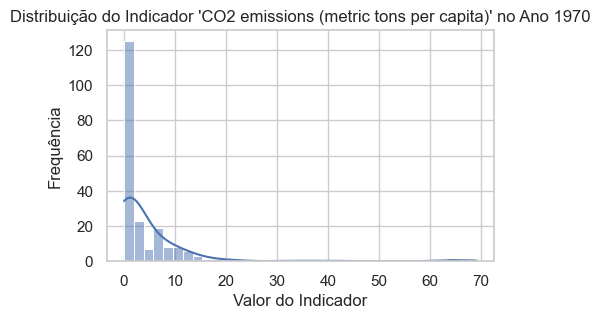

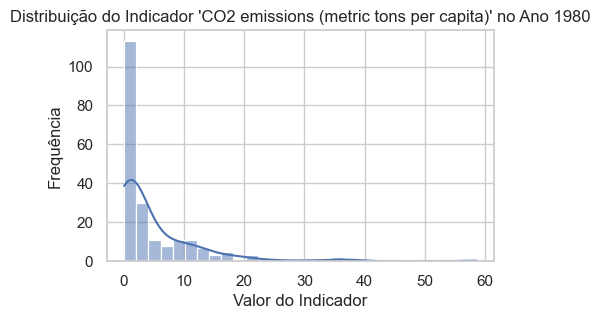

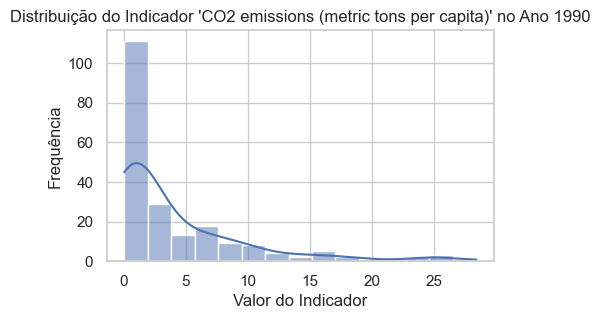

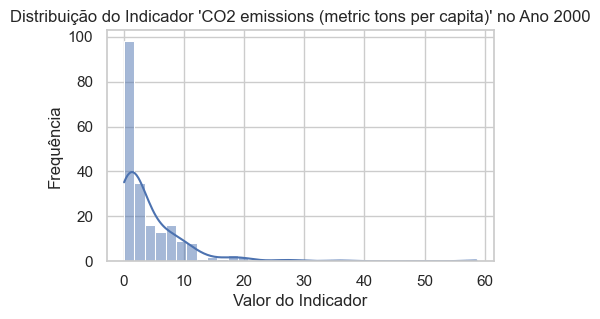

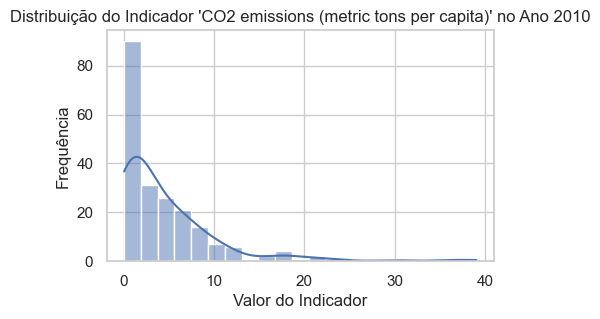

In [8]:
# Gerar gráficos de distribuição para os anos específicos
anos_para_analisar = ["1970", "1980", "1990", "2000", "2010"]

for ano in anos_para_analisar:
    if ano in dados_filtrados.columns:
        plt.figure(figsize=(5, 3))  # Ajuste do tamanho para melhor visualização
        sns.histplot(dados_filtrados[ano].dropna(), kde=True)
        plt.title(f"Distribuição do Indicador '{indicador_escolhido}' no Ano {ano}")
        plt.xlabel("Valor do Indicador")
        plt.ylabel("Frequência")
        plt.show()

### Observações dos Outputs

**Forma das Distribuições:**

- Para todos os anos (1970, 1980, 1990, 2000 e 2010), a distribuição é enviesada à direita, indicando que a maioria dos países possui emissões de CO2 por habitante relativamente baixas, enquanto poucos apresentam valores extremamente altos (outliers).
- Isso reflete a discrepância entre países desenvolvidos e em desenvolvimento no que diz respeito às emissões de carbono.

**Tendências:**

- A dispersão parece aumentar com o passar dos anos, sugerindo que alguns países aumentaram consideravelmente suas emissões.
- É importante explorar quais países apresentam esses outliers e os fatores associados.

**Outliers:**

- A presença de valores extremos pode exigir tratamento especial, como normalização ou exclusão dependendo do impacto na análise.

**Dados Consistentes:**

- Não há lacunas ou inconsistências evidentes nos dados plotados para os anos analisados.


Estratégia para Tornar o Processo Mais Eficiente
===============================================

**Automatizar o Processo**

- Em vez de repetir manualmente os passos 2 e 3 para cada indicador, cria-se um loop para gerar gráficos automaticamente para todos os indicadores de cada pilar (Ambiental, Social, e Governança).

**Foco Inicial**

- Analisar um ou dois indicadores de cada pilar, especialmente aqueles que se mostram mais relevantes. Isso permitirá o desenvolvimento de insights iniciais e o refinamento da abordagem a ser tomada antes de processar os 20 indicadores.

**Agrupamento de Indicadores**

- Se os indicadores de um pilar forem semelhantes em comportamento ou impacto, pode-se criar gráficos combinados para analisar tendências gerais.

**Código para Automatizar a Análise de Todos os Indicadores**

- Um código que gera gráficos para todos os indicadores de cada pilar de forma eficiente e documentada.

---

Benefícios do Código Automatizado
=================================

1. **Economia de Tempo**

   - Analisa todos os indicadores de forma automatizada, sem precisar repetir os comandos.

2. **Documentação Completa**

   - Garante que todos os indicadores sejam analisados de maneira consistente.

3. **Comparações Facilitadas**

   - Ajuda a identificar rapidamente os indicadores que requerem atenção especial.

**Próximos Passos**
1. Executar a análise automatizada.
2. Revisar os gráficos para identificar padrões gerais.
3. Priorizar indicadores que apresentem distribuições incomuns ou desafios específicos para análise detalhada.